<a href="https://colab.research.google.com/github/ionayu/Python_Small_Business_Loan/blob/main/Business_Loan_Approval_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Dataset URL: https://www.kaggle.com/mirbektoktogaraev/should-this-loan-be-approved-or-denied

In [ ]:
# Import pandas and read in our GDrive-mounted csv

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns 
sns.set()

import matplotlib.pyplot as plt

# suppress warnings (warnings do not prevent the code from executing)
import warnings
warnings.filterwarnings("ignore")

loans_df = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/SBAnational.csv')
loans_df.head(10)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
5,1000084002,"B&T SCREW MACHINE COMPANY, INC",PLAINVILLE,CT,6062,"TD BANK, NATIONAL ASSOCIATION",DE,332721,28-Feb-97,1997,120,19,1.0,0,0,1,0,N,N,NaN,30-Jun-97,"$517,000.00",$0.00,P I F,$0.00,"$517,000.00","$387,750.00"
6,1000093009,MIDDLE ATLANTIC SPORTS CO INC,UNION,NJ,7083,WELLS FARGO BANK NATL ASSOC,SD,0,2-Jun-80,1980,45,45,2.0,0,0,0,0,N,N,24-Jun-91,22-Jul-80,"$600,000.00",$0.00,CHGOFF,"$208,959.00","$600,000.00","$499,998.00"
7,1000094005,WEAVER PRODUCTS,SUMMERFIELD,FL,34491,REGIONS BANK,AL,811118,28-Feb-97,1997,84,1,2.0,0,0,1,0,N,Y,NaN,30-Jun-98,"$45,000.00",$0.00,P I F,$0.00,"$45,000.00","$36,000.00"
8,1000104006,TURTLE BEACH INN,PORT SAINT JOE,FL,32456,CENTENNIAL BANK,FL,721310,28-Feb-97,1997,297,2,2.0,0,0,1,0,N,N,NaN,31-Jul-97,"$305,000.00",$0.00,P I F,$0.00,"$305,000.00","$228,750.00"
9,1000124001,INTEXT BUILDING SYS LLC,GLASTONBURY,CT,6073,WEBSTER BANK NATL ASSOC,CT,0,28-Feb-97,1997,84,3,2.0,0,0,1,0,N,Y,NaN,30-Apr-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"


In [ ]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [ ]:
# Quick check to use of there are any null values
print(loans_df.isnull().values.any())

True


In [ ]:
# Change the column DisbursementGross, SBA_Appv and GrAppv from object to int for easier analysis

loans_df['SBA_Appv'] = loans_df['SBA_Appv'].str.replace(',','')
loans_df['SBA_Appv'] = loans_df['SBA_Appv'].str.replace('$','')
loans_df['SBA_Appv'] = loans_df['SBA_Appv'].astype(float)
loans_df['SBA_Appv'] = loans_df['SBA_Appv'].astype(int)

loans_df['GrAppv'] = loans_df['GrAppv'].str.replace(',','')
loans_df['GrAppv'] = loans_df['GrAppv'].str.replace('$','')
loans_df['GrAppv'] = loans_df['GrAppv'].astype(float)
loans_df['GrAppv'] = loans_df['GrAppv'].astype(int)

loans_df['DisbursementGross'] = loans_df['DisbursementGross'].str.replace(',','')
loans_df['DisbursementGross'] = loans_df['DisbursementGross'].str.replace('$','')
loans_df['DisbursementGross'] = loans_df['DisbursementGross'].astype(float)
loans_df['DisbursementGross'] = loans_df['DisbursementGross'].astype(int)

loans_df.head()


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,60000,$0.00,P I F,$0.00,60000,48000
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,40000,$0.00,P I F,$0.00,40000,32000
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,287000,$0.00,P I F,$0.00,287000,215250
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,35000,$0.00,P I F,$0.00,35000,28000
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,229000,$0.00,P I F,$0.00,229000,229000


In [ ]:
# loans_df = loans_df.iloc[(loans_df['LowDoc'] != 0).values]
# loans_df = loans_df.iloc[(loans_df['LowDoc'] != 1).values]
# loans_df = loans_df.iloc[(loans_df['LowDoc'] != 'A').values]
# loans_df = loans_df.iloc[(loans_df['LowDoc'] != 'C').values]
# loans_df = loans_df.iloc[(loans_df['LowDoc'] != 'R').values]
# loans_df = loans_df.iloc[(loans_df['LowDoc'] != 'S').values]

In [ ]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

# **1. Different Visualizations and Analysis of the Dataset**

## Show the range and distribution of the SBA Approved guaranteed amount of approved loan.

In [ ]:
pd.options.display.float_format = '{:2f}'.format
loans_df['SBA_Appv'].describe()

count    899164.000000
mean     149488.788175
std      228414.561519
min         100.000000
25%       21250.000000
50%       61250.000000
75%      175000.000000
max     5472000.000000
Name: SBA_Appv, dtype: float64

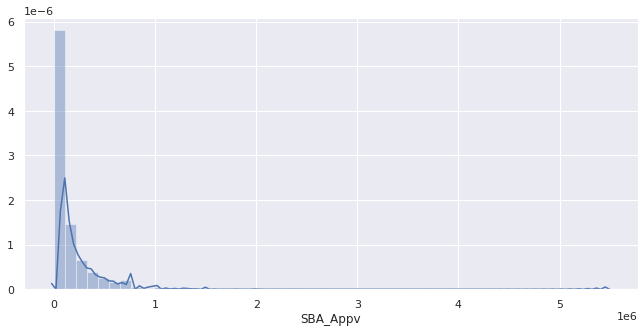

In [ ]:
plt.figure(figsize= (11,5))
sns.distplot(loans_df['SBA_Appv'])

## Show the range and distribution of the gross distribution of loans.

In [ ]:
loans_df['DisbursementGross'].describe()

count    8.991640e+05
mean     2.011540e+05
std      2.876408e+05
min      0.000000e+00
25%      4.200000e+04
50%      1.000000e+05
75%      2.380000e+05
max      1.144632e+07
Name: DisbursementGross, dtype: float64

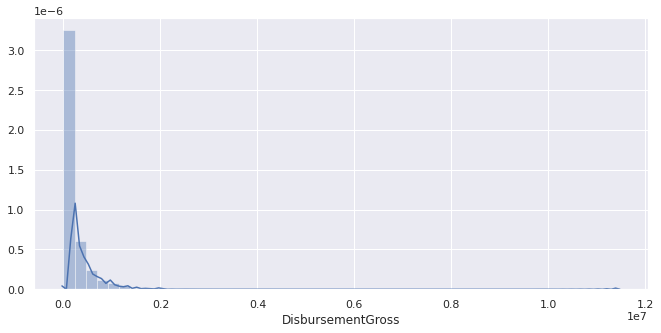

In [ ]:
plt.figure(figsize= (11,5))
sns.distplot(loans_df['DisbursementGross'])

## Use a boxplot to illustrate if the business is new or existing would affect the SBA Approved guaranteed amount of approved loan. Use the same variables for the gross distribution of loss.

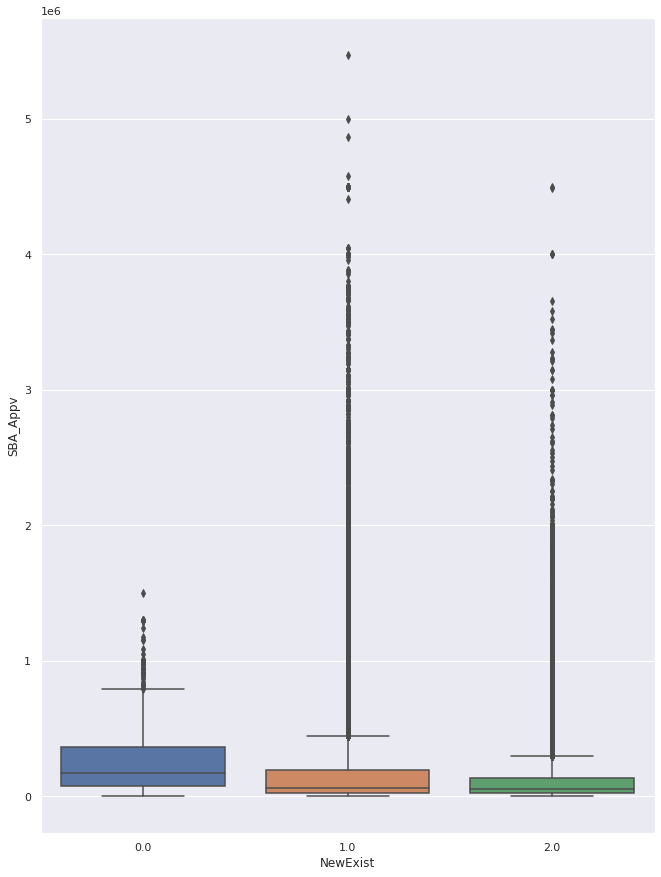

In [ ]:
plt.figure(figsize=(11,15))
retained_SBA_Appv = sns.boxplot(y='SBA_Appv',x='NewExist', data= loans_df)

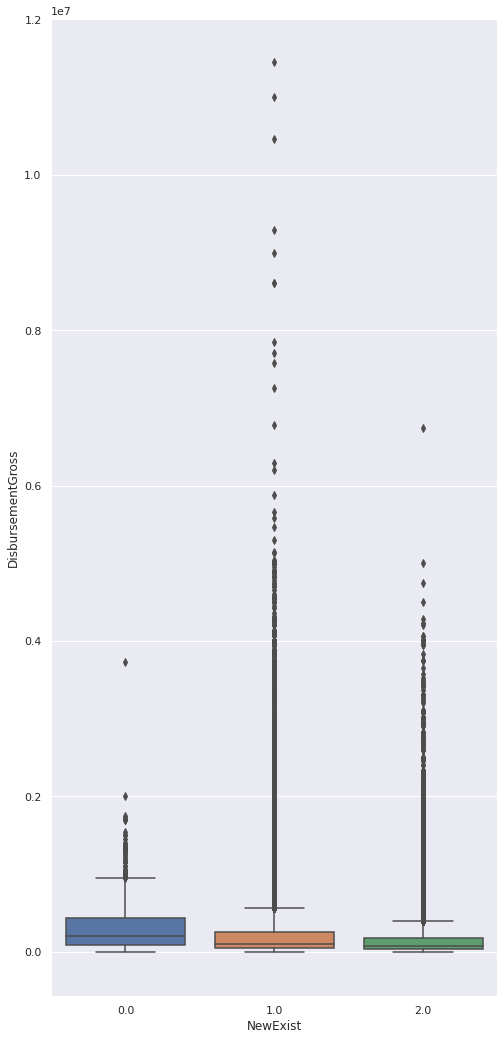

In [ ]:
plt.figure(figsize=(8,18))
retained_SBA_Appv = sns.boxplot(y='DisbursementGross',x='NewExist', data= loans_df)

## Show the range and distribution of the loan term in months.

In [ ]:
loans_df['Term'].describe()

count    899164.000000
mean        110.773078
std          78.857305
min           0.000000
25%          60.000000
50%          84.000000
75%         120.000000
max         569.000000
Name: Term, dtype: float64

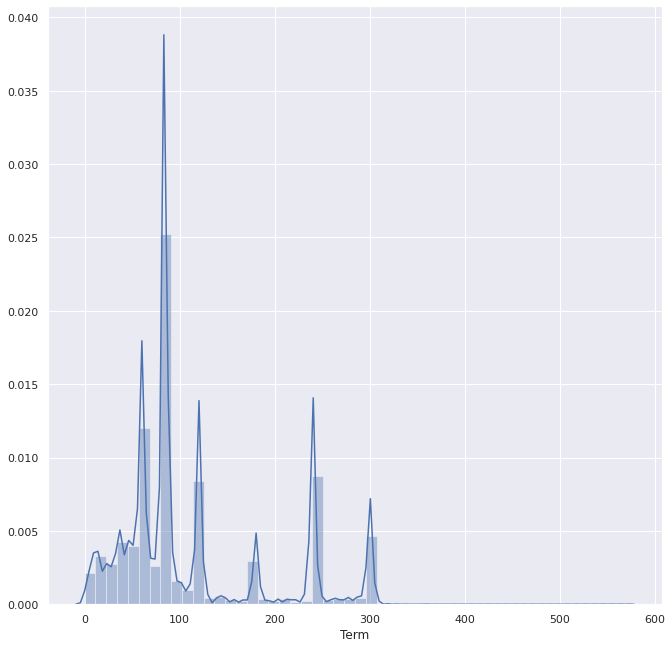

In [ ]:
plt.figure(figsize= (11,11))
sns.distplot(loans_df['Term'])

## Is there a correlation between the loan term in months and the SBA Approved guuranteed amount of approved loan? Check for the gross distribution for loans as well.


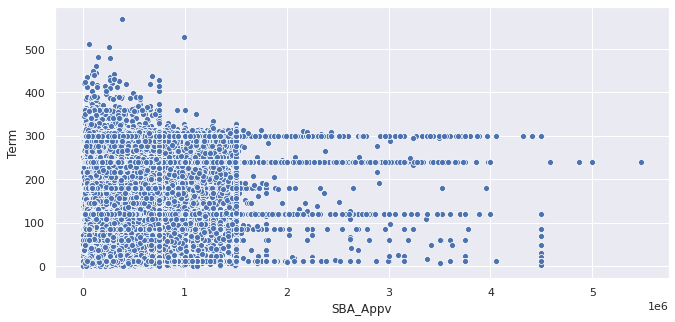

In [ ]:
plt.figure(figsize= (11,5))
sns.scatterplot(x='SBA_Appv', y='Term',data=loans_df)

In [ ]:
stats.pearsonr(loans_df['SBA_Appv'],loans_df['Term'])

# This shows that these variables are moderately correlated. They have a positive correlation.

(0.524912150996684, 0.0)

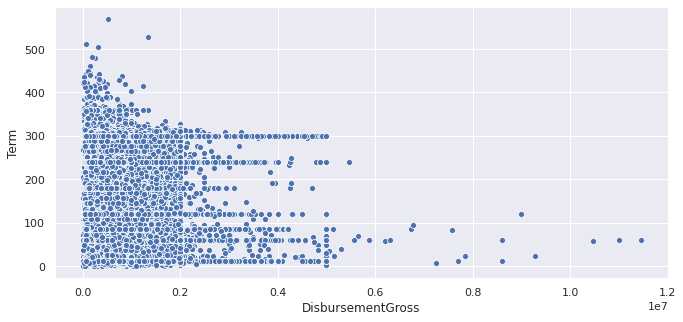

In [ ]:
plt.figure(figsize= (11,5))
sns.scatterplot(x='DisbursementGross', y='Term',data=loans_df)

In [ ]:
stats.pearsonr(loans_df['DisbursementGross'],loans_df['Term'])

# This shows that these variables are moderately correlated. They have a positive correlation.

(0.4663907991866669, 0.0)

## Use a boxplot to illustrate if the loan status would affect the SBA Approved guaranteed amount of approved loan. Do the same for the gross distribution of loans.

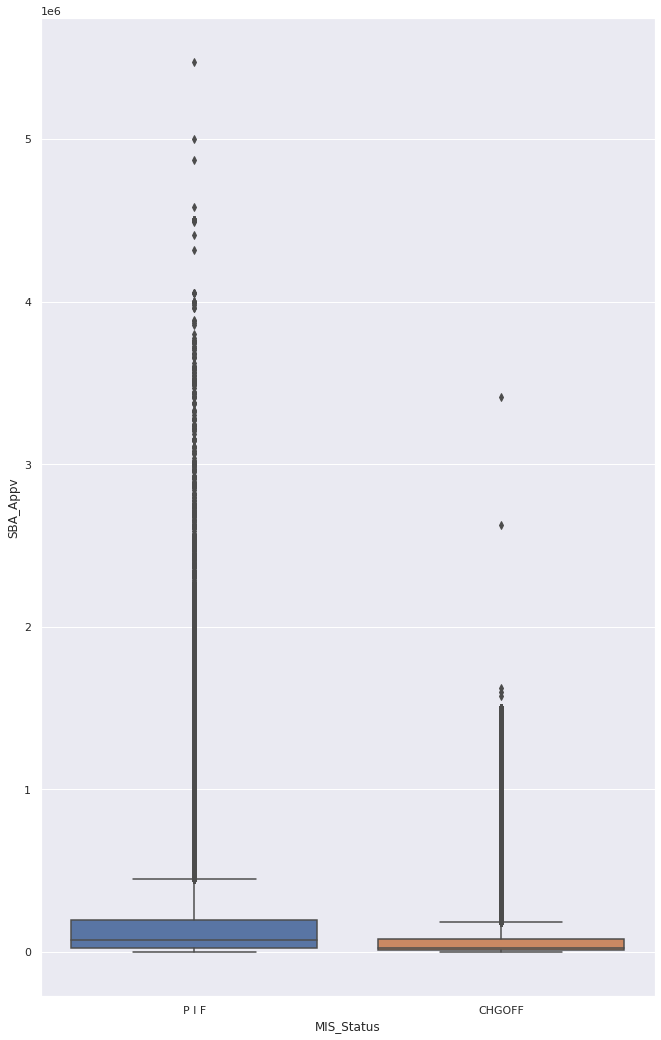

In [ ]:
plt.figure(figsize=(11,18))
sns.boxplot(y='SBA_Appv', x='MIS_Status', data= loans_df)

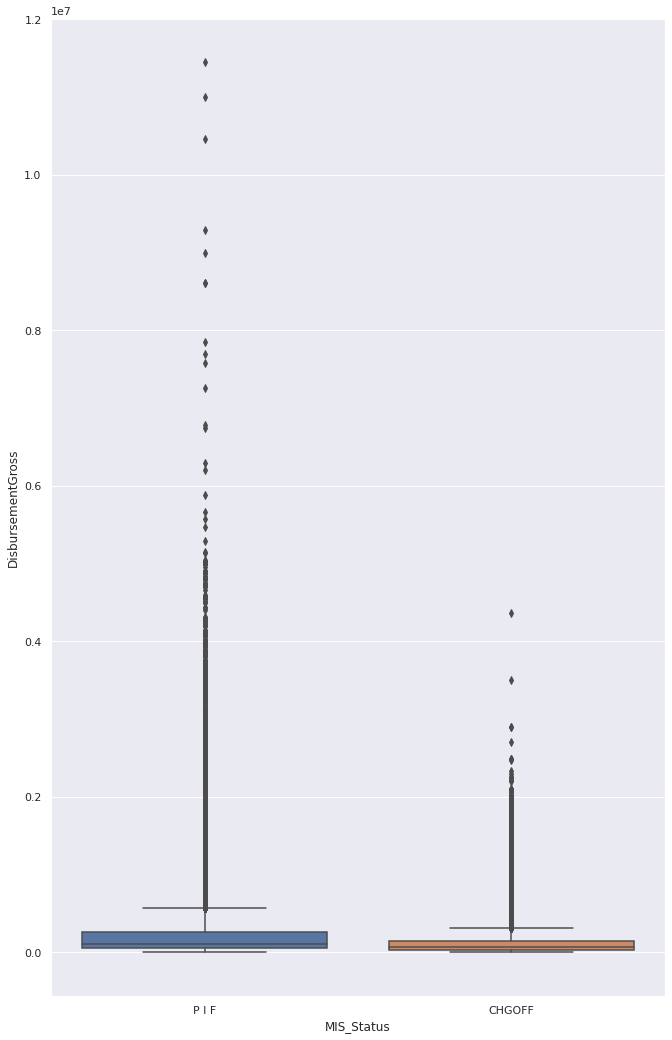

In [ ]:
plt.figure(figsize=(11,18))
sns.boxplot(y='DisbursementGross', x='MIS_Status', data= loans_df)

## Is there a correlation between the gross distribution of loan and the SBA Approved guaranteed amount of approved loan?

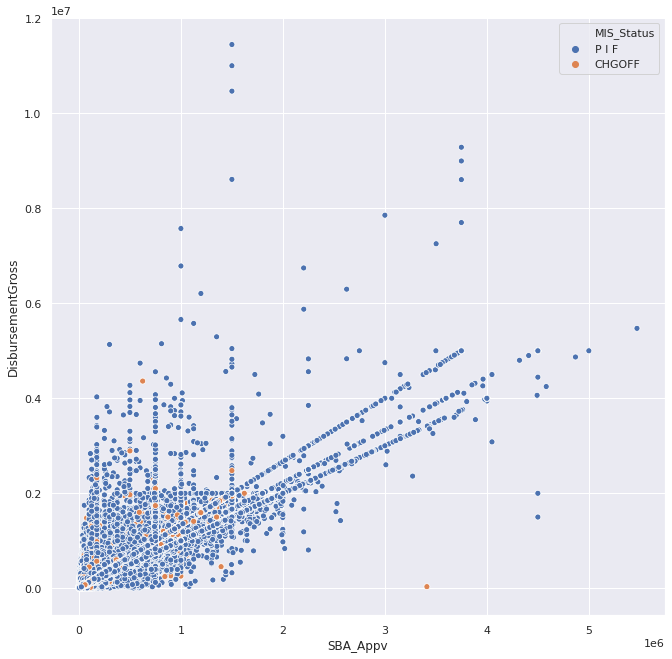

In [ ]:
plt.figure(figsize= (11,11))
sns.scatterplot(x='SBA_Appv', y='DisbursementGross', hue='MIS_Status',data=loans_df)

In [ ]:
stats.pearsonr(loans_df['SBA_Appv'],loans_df['DisbursementGross'])

(0.9401342986281815, 0.0)

# **2. Hypotheses**

## Null Hypothesis: There is no significant difference between distribution amount of loan for businesses that have different loan statuses.

In [ ]:
PIF_loans_df = loans_df.iloc[(loans_df['MIS_Status'] != 'CHGOFF').values]
PIF_loans_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 741606 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      741606 non-null  int64  
 1   Name               741593 non-null  object 
 2   City               741576 non-null  object 
 3   State              741594 non-null  object 
 4   Zip                741606 non-null  int64  
 5   Bank               740117 non-null  object 
 6   BankState          740112 non-null  object 
 7   NAICS              741606 non-null  int64  
 8   ApprovalDate       741606 non-null  object 
 9   ApprovalFY         741606 non-null  object 
 10  Term               741606 non-null  int64  
 11  NoEmp              741606 non-null  int64  
 12  NewExist           741484 non-null  float64
 13  CreateJob          741606 non-null  int64  
 14  RetainedJob        741606 non-null  int64  
 15  FranchiseCode      741606 non-null  int64  
 16  Ur

In [ ]:
default_loans_df = loans_df.iloc[(loans_df['MIS_Status'] == 'CHGOFF').values]
default_loans_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157558 entries, 6 to 899162
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      157558 non-null  int64  
 1   Name               157557 non-null  object 
 2   City               157558 non-null  object 
 3   State              157556 non-null  object 
 4   Zip                157558 non-null  int64  
 5   Bank               157488 non-null  object 
 6   BankState          157486 non-null  object 
 7   NAICS              157558 non-null  int64  
 8   ApprovalDate       157558 non-null  object 
 9   ApprovalFY         157558 non-null  object 
 10  Term               157558 non-null  int64  
 11  NoEmp              157558 non-null  int64  
 12  NewExist           157544 non-null  float64
 13  CreateJob          157558 non-null  int64  
 14  RetainedJob        157558 non-null  int64  
 15  FranchiseCode      157558 non-null  int64  
 16  Ur

In [ ]:
stats.ttest_ind(PIF_loans_df['DisbursementGross'], default_loans_df['DisbursementGross'], equal_var=False)

Ttest_indResult(statistic=130.71278284027366, pvalue=0.0)

In [ ]:
sample_pif_loans = PIF_loans_df.sample(n=20000)
sample_default_loans = default_loans_df.sample(n=20000)

In [ ]:
stats.ttest_ind(sample_pif_loans['DisbursementGross'], sample_default_loans['DisbursementGross'])

Ttest_indResult(statistic=30.761828563867695, pvalue=2.124757465380574e-205)